PDF解析のサンプル

In [1]:
from sova.core.file import File
from sova.computation.structure_factor import (histogram,gr,total_gr,SQ,total_SQ,total_FQ,
                                            ncoeff,xcoeff,Gr,Tr,Nr)
import matplotlib.pyplot as plt
%matplotlib inline

ファイルからデータを読み込んでAtomsクラスオブジェクトを生成

In [2]:
path = "../data/amorphous_md/a_SiO2_speed1e11K_rand.xyz"
f = File.open(path)
atoms = f.getatoms()
dr = 0.05

ヒストグラム計算

In [3]:
r, hist = histogram(atoms,dr)

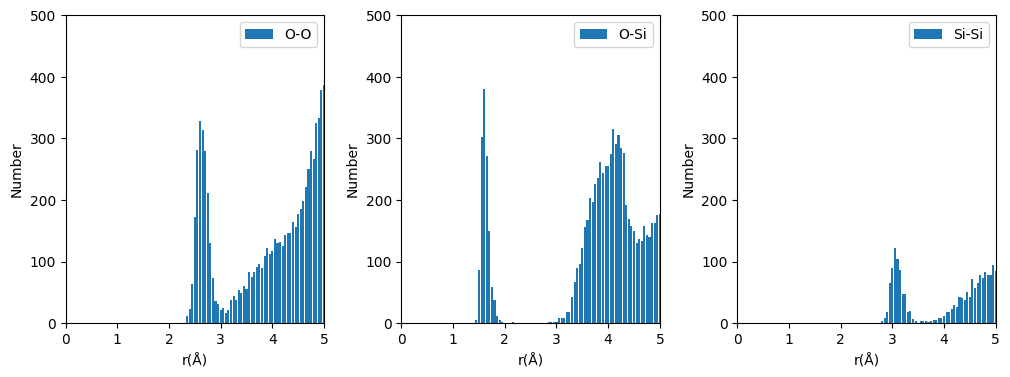

In [4]:
fig = plt.figure(figsize=(12, 4)) 
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.bar(r, hist.T[i], width=dr*0.8, label=atoms.pairs[i])
    ax.set_xlim(0.0,5.0)
    ax.set_ylim(0,500)
    ax.set_xlabel('r(Å)')
    ax.set_ylabel('Number')
    ax.legend()
plt.subplots_adjust(wspace=0.3)
plt.show()

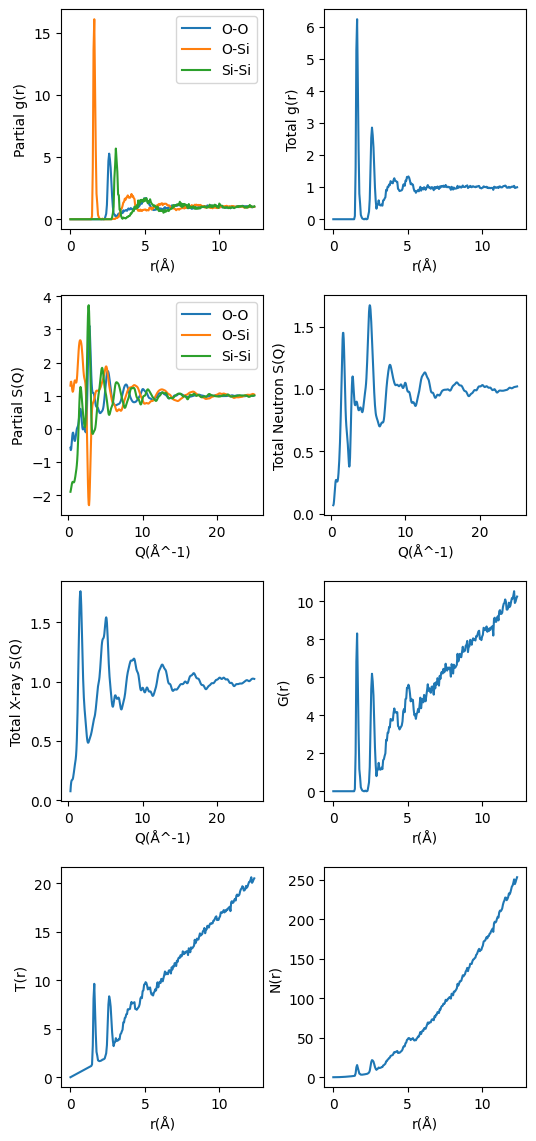

In [5]:
# calculate g(r)
r, _gr = gr(atoms,hist,dr)

# calculate Total g(r)
coeff = ncoeff(atoms.symbols,atoms.frac)
total_gr = total_gr(_gr,coeff)

# calculate S(Q)
dq = 0.05
qmin = 0.3
qmax = 25.0
q, sq = SQ(atoms,_gr,qmin,qmax,dr,dq)

# calculate Total S(Q)
total_sq = total_SQ(sq,coeff)

# calculate F(Q)
coeff = xcoeff(atoms.symbols,atoms.frac,q)
total_fq = total_FQ(sq,coeff)

# calculate Gr
rho = atoms.rho
_Gr = Gr(r,total_gr,rho)

# calculate Tr
_Tr = Tr(r,total_gr,rho)

# calculate Nr
_Nr = Nr(r,_Tr)

# show graph
fig = plt.figure(figsize=(6, 14)) 
ax = fig.add_subplot(4, 2, 1)
#ax.set_title('Partial g(r)')
for i in range(3):    
    ax.plot(r, _gr.T[i], label=atoms.pairs[i])
    ax.set_xlabel('r(Å)')
    ax.set_ylabel('Partial g(r)')
    ax.legend()

ax = fig.add_subplot(4, 2, 2)
#ax.set_title('Total g(r)')
ax.set_xlabel('r(Å)')
ax.set_ylabel('Total g(r)')
ax.plot(r,total_gr)

ax = fig.add_subplot(4, 2, 3)
#ax.set_title('Partial S(Q)')
for i in range(3):    
    ax.plot(q, sq.T[i], label=atoms.pairs[i])
    ax.set_xlabel('Q(Å^-1)')
    ax.set_ylabel('Partial S(Q)')
    ax.legend()

ax = fig.add_subplot(4, 2, 4)
#ax.set_title('Total Neutron S(Q)')
ax.set_xlabel('Q(Å^-1)')
ax.set_ylabel('Total Neutron S(Q)')
ax.plot(q, total_sq)

ax = fig.add_subplot(4, 2, 5)
#ax.set_title('Total X-ray S(Q)')
ax.set_xlabel('Q(Å^-1)')
ax.set_ylabel('Total X-ray S(Q)')
ax.plot(q, total_fq)

ax = fig.add_subplot(4, 2, 6)
#ax.set_title('G(r)')
ax.set_xlabel('r(Å)')
ax.set_ylabel('G(r)')
ax.plot(r, _Gr)

ax = fig.add_subplot(4, 2, 7)
#ax.set_title('T(r)')
ax.set_xlabel('r(Å)')
ax.set_ylabel('T(r)')
ax.plot(r, _Tr)

ax = fig.add_subplot(4, 2, 8)
#ax.set_title('N(r)')
ax.set_xlabel('r(Å)')
ax.set_ylabel('N(r)')
ax.plot(r, _Nr)

plt.subplots_adjust(wspace=0.3)
plt.subplots_adjust(hspace=0.3)
plt.show()

表示する原子の種類を並べ替える

In [6]:
# calculate histogram
r, hist = histogram(atoms,dr,symbols=['Si','O'])

print(atoms.pairs)

['Si-Si', 'Si-O', 'O-O']


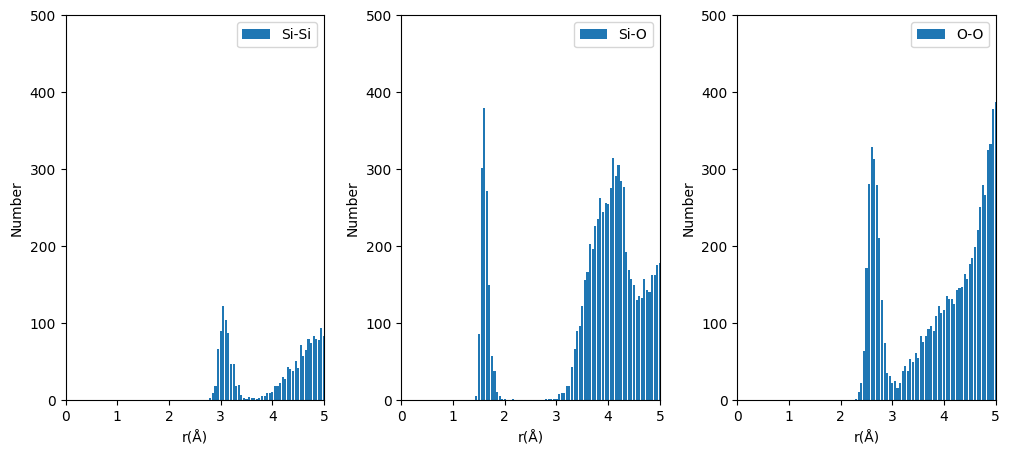

In [7]:
fig = plt.figure(figsize=(12, 5)) 
for i in range(3):
    ax = fig.add_subplot(1, 3, i+1)
    ax.bar(r, hist.T[i], width=dr*0.8, label=atoms.pairs[i])
    ax.set_xlim(0.0,5.0)
    ax.set_ylim(0,500)
    ax.set_xlabel('r(Å)')
    ax.set_ylabel('Number')
    ax.legend()
plt.subplots_adjust(wspace=0.3)
plt.show()

xyzファイルのデータを解析する

In [8]:
path = "../data/a_Si.xyz"
f = File.open(path)
atoms = f.getatoms()

print("Periodic : ", atoms.volume.periodic)

Periodic :  False


ヒストグラム解析（周期境界はないので二体相関関数は計算不可）

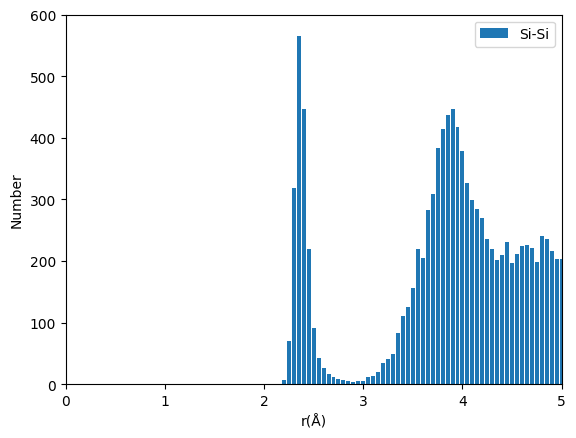

In [9]:
# calculate histogram
r, hist = histogram(atoms, dr)

fig = plt.figure() 
ax = fig.add_subplot()
ax.bar(r, hist.T[0], width=dr*0.8, label=atoms.pairs[0])
ax.set_xlim(0.0,5.0)
ax.set_ylim(0,600)
ax.set_xlabel('r(Å)')
ax.set_ylabel('Number')
ax.legend()
plt.show()